In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
import string

In [89]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [90]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [91]:
df_train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [92]:
cat_features = np.array([i for i in df_train.columns.tolist() if df_train[i].dtype == 'object'])
num_features = np.array([i for i in df_train.columns.tolist() if df_train[i].dtype != 'object'])

print("Number features column =" , len(num_features))
print("Categorial features column =" , len(cat_features))

Number features column = 2
Categorial features column = 3


In [93]:
miss_col_train = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=True)
percent_miss_train = round((miss_col_train / len(df_train) * 100) , 2)
missing_train = pd.DataFrame([miss_col_train, percent_miss_train]).T.rename(columns={0:'Feature', 1:'missing'})
missing_train

,Feature,missing
keyword,61.0,0.80
location,2533.0,33.27


In [94]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  
imputer.fit(df_train)
df_train.loc[:,:] = imputer.fit_transform(df_train) 

df_train = pd.DataFrame(df_train)

In [95]:
df_train.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [97]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [98]:
pd.set_option('max_colwidth', 500)
df_train[['text']].head(10)

,text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,"13,000 people receive #wildfires evacuation orders in California"
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas"
7,I'm on top of the hill and I can see a fire in the woods...
8,There's an emergency evacuation happening now in the building across the street
9,I'm afraid that the tornado is coming to our area...


In [99]:
# df_train['lower'] = df_train['clean_text'].apply(lambda x: [word.lower() for word in x])
# df_train['no_stopwords'] = df_train['lower'].apply(lambda x: [word for word in x if word not in set(nltk.corpus.stopwords.words('english'))])

In [100]:
# df_train['no_stopwords'] = [' '.join(map(str, l)) for l in df_train['no_stopwords']]
# df_train.head()

# Exploratory Data Analysis


([<matplotlib.patches.Wedge at 0x79a283d9da90>,
 [Text(-1.0500153447956369, 0.327822780925457, 'Not Disaster'),
  Text(1.0500153447956364, -0.327822780925458, 'Disaster')],
 [Text(-0.5727356426158019, 0.17881242595934016, '57.03%'),
  Text(0.5727356426158017, -0.17881242595934074, '42.97%')])

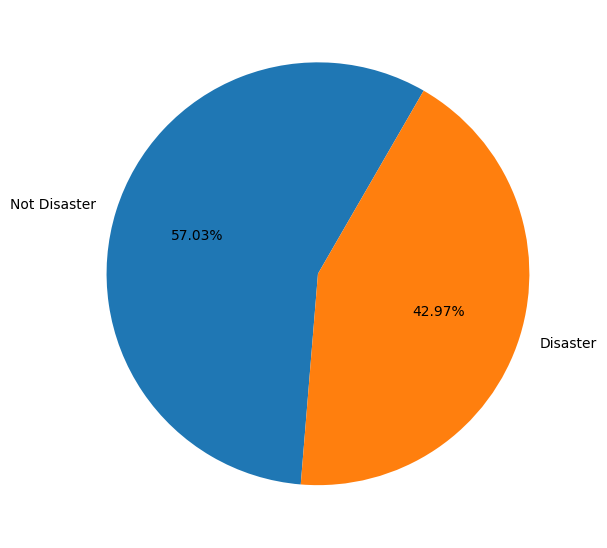

In [101]:
plt.figure(figsize=(15, 7), dpi=100)

plt.pie(df_train['target'].value_counts(),
             labels=['Not Disaster', 'Disaster'],
             autopct='%1.2f%%',
             startangle=60)

## Average number of words in a processed tweet


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'disaster tweets')

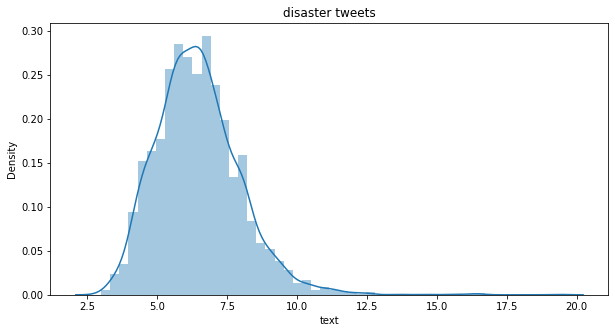

In [102]:
fig, ax1 = plt.subplots(figsize=(10,5))

word = df_train[df_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1)
ax1.set_title('disaster tweets')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Non disaster tweets')

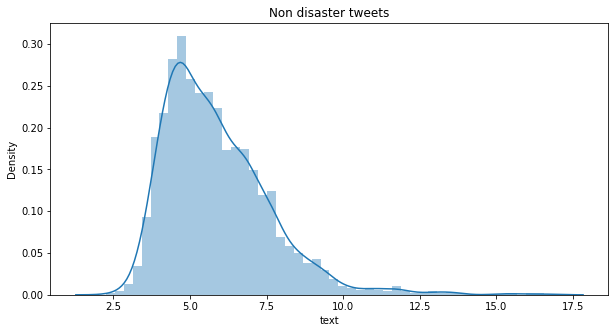

In [103]:
fig, ax2 = plt.subplots(figsize=(10,5))

word = df_train[df_train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2)
ax2.set_title('Non disaster tweets')

# Data cleaning and preprocessing


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras import optimizers
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
import tensorflow as tf
import tqdm
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

In [105]:
df_train['text'].str.lower()
#df['text'].head()

0                                                                           our deeds are the reason of this #earthquake may allah forgive us all
1                                                                                                          forest fire near la ronge sask. canada
2           all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected
3                                                                               13,000 people receive #wildfires evacuation orders in california 
4                                                        just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school 
                                                                          ...                                                                    
7608                                                          two giant cranes holding a bridge collapse into nearby homes h

In [106]:
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'', text)
df_train['text'] = df_train['text'].apply(remove_number)

In [107]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

df_train['text'] = df_train['text'].apply(remove_url)

In [108]:
def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)
df_train['text'] = df_train['text'].apply(remove_html)

In [109]:
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


df_train['text'] = df_train['text'].apply(remove_punctuations_numbers)

In [110]:
def tokenization(inputs):  
    return word_tokenize(inputs)

df_train['text'] = df_train['text'].apply(tokenization)
df_train['text'].head()

0                                                                           [Our, Deeds, are, the, Reason, of, this, earthquake, May, ALLAH, Forgive, us, all]
1                                                                                                                [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, to, shelter, in, place, are, being, notified, by, officers, No, other, evacuation, or, shelter, in, place, orders, are, expected]
3                                                                                             [people, receive, wildfires, evacuation, orders, in, California]
4                                                       [Just, got, sent, this, photo, from, Ruby, Alaska, as, smoke, from, wildfires, pours, into, a, school]
Name: text, dtype: object

In [111]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stop_words.remove('not')

def stopwords_remove(inputs):
    return [k for k in inputs if k not in stop_words]

df_train['text'] = df_train['text'].apply(stopwords_remove)
df_train['text'].head()

# stop_words = set(stopwords.words('english'))
# stop_words.remove('not')
# df_train['text'] = df_train['text'].apply(lambda x: [k for k in x if k not in stop_words])
# df_train['text'].head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                        [Our, Deeds, Reason, earthquake, May, ALLAH, Forgive, us]
1                                                                    [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, shelter, place, notified, officers, No, evacuation, shelter, place, orders, expected]
3                                                     [people, receive, wildfires, evacuation, orders, California]
4                                          [Just, got, sent, photo, Ruby, Alaska, smoke, wildfires, pours, school]
Name: text, dtype: object

In [112]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]

df_train['text'] = df_train['text'].apply(lemmatization)
df_train['text'].head()

# lemmatizer = WordNetLemmatizer()
# df_train['text'] = df_train['text'].apply(lambda x: [lemmatizer.lemmatize(word=kk, pos='v') for kk in x])
# df_train['text'].head()

0                                                [Our, Deeds, Reason, earthquake, May, ALLAH, Forgive, us]
1                                                            [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, ask, shelter, place, notify, officer, No, evacuation, shelter, place, order, expect]
3                                              [people, receive, wildfires, evacuation, order, California]
4                                   [Just, get, send, photo, Ruby, Alaska, smoke, wildfires, pour, school]
Name: text, dtype: object

In [113]:
def word_length_filter(inputs):
    return [j for j in inputs if len(j) > 2]

df_train['text'] = df_train['text'].apply(word_length_filter)
df_train['text'].head()

# df_train['text'] = df_train['text'].apply(lambda x: [j for j in x if len(j) > 2])
# df_train['text'].head()

0                                                [Our, Deeds, Reason, earthquake, May, ALLAH, Forgive]
1                                                            [Forest, fire, near, Ronge, Sask, Canada]
2    [All, residents, ask, shelter, place, notify, officer, evacuation, shelter, place, order, expect]
3                                          [people, receive, wildfires, evacuation, order, California]
4                               [Just, get, send, photo, Ruby, Alaska, smoke, wildfires, pour, school]
Name: text, dtype: object

In [114]:
df_train['text'] = df_train['text'].str.join(' ')
df_train['text'].head()

0                                           Our Deeds Reason earthquake May ALLAH Forgive
1                                                      Forest fire near Ronge Sask Canada
2    All residents ask shelter place notify officer evacuation shelter place order expect
3                                    people receive wildfires evacuation order California
4                             Just get send photo Ruby Alaska smoke wildfires pour school
Name: text, dtype: object

In [115]:
df_train['tokenized'] = df_train['text'].apply(word_tokenize)
df_train.head()

,id,keyword,location,text,target,tokenized
0,1,fatalities,USA,Our Deeds Reason earthquake May ALLAH Forgive,1,"[Our, Deeds, Reason, earthquake, May, ALLAH, Forgive]"
1,4,fatalities,USA,Forest fire near Ronge Sask Canada,1,"[Forest, fire, near, Ronge, Sask, Canada]"
2,5,fatalities,USA,All residents ask shelter place notify officer evacuation shelter place order expect,1,"[All, residents, ask, shelter, place, notify, officer, evacuation, shelter, place, order, expect]"
3,6,fatalities,USA,people receive wildfires evacuation order California,1,"[people, receive, wildfires, evacuation, order, California]"
4,7,fatalities,USA,Just get send photo Ruby Alaska smoke wildfires pour school,1,"[Just, get, send, photo, Ruby, Alaska, smoke, wildfires, pour, school]"


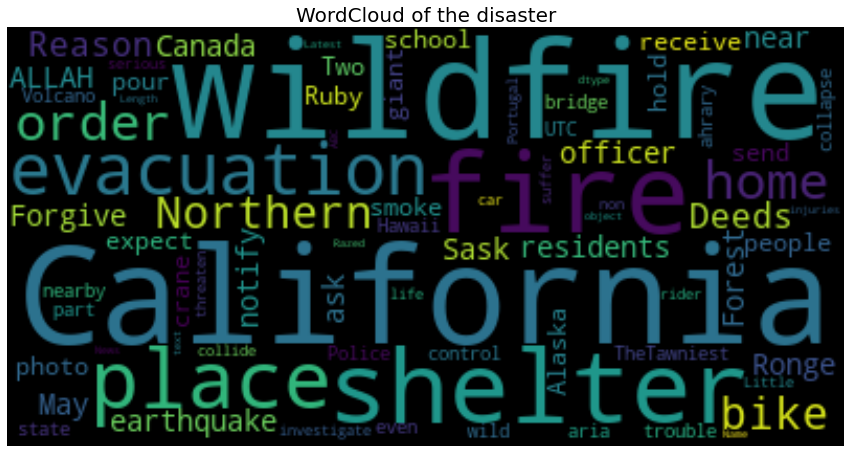

In [116]:
data_disaster = df_train[df_train['target'] == 1] 
data_not_disaster = df_train[df_train['target'] == 0]  

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_disaster['text'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the disaster', fontsize=20)
plt.axis("off")
plt.show()

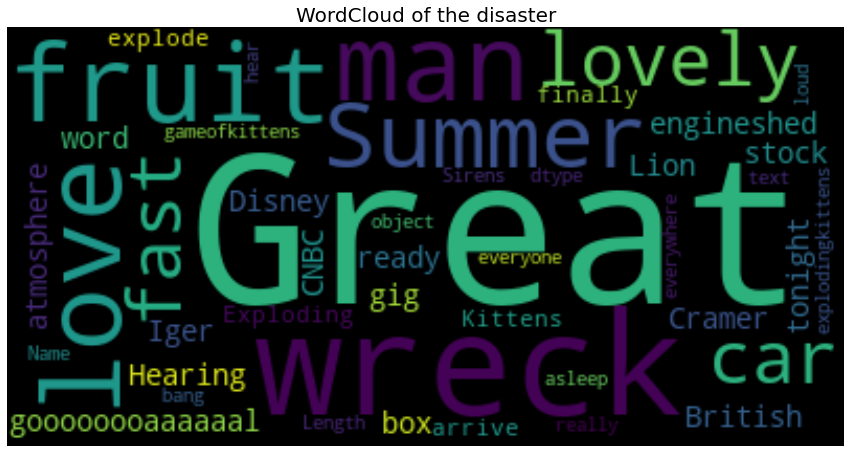

In [117]:
WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_not_disaster['text'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the disaster', fontsize=20)
plt.axis("off")
plt.show()

# LSTM model

In [118]:
X = df_train['text']
y = df_train['target']

X.head()

0                                           Our Deeds Reason earthquake May ALLAH Forgive
1                                                      Forest fire near Ronge Sask Canada
2    All residents ask shelter place notify officer evacuation shelter place order expect
3                                    people receive wildfires evacuation order California
4                             Just get send photo Ruby Alaska smoke wildfires pour school
Name: text, dtype: object

In [119]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Tokenizing with Tensorflow

In [120]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_test)

print('Non-tokenized Version: ', X_train[70])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train[70]]))

Non-tokenized Version:  Had personalinjury accident summer Read advice see solicitor help OtleyHour
Tokenized Version:  [[964, 5485, 67, 246, 106, 5486, 24, 3547, 77, 5487]]


## Padding the Datasets

In [121]:
maxlen = 50
padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

In [122]:
embed_dim = 200 
lstm_out = 64
dropout = 0.5

model = Sequential()
model.add(Embedding(num_words, embed_dim, input_length=maxlen))
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(lstm_out, 
                           return_sequences=True,  
                           kernel_regularizer=tf.keras.regularizers.l2(0.01),
                           recurrent_regularizer=tf.keras.regularizers.l2(0.01)))) 
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(lstm_out, 
                             kernel_regularizer=tf.keras.regularizers.l2(0.01),
                             recurrent_regularizer=tf.keras.regularizers.l2(0.01))))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(1, activation='sigmoid'))  
optimizer = tf.optimizers.Adam(lr=5e-4)  

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 200)           2000000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 200)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 128)           135680    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [123]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                  mode='auto', 
                                                  patience=5, 
                                                  restore_best_weights=True)

epochs = 100
history = model.fit(padded_train, y_train, epochs=epochs, 
                    validation_data=(padded_val, y_test), 
                    callbacks=[early_stopping], batch_size=32)

Epoch 1/100
191/191 [==============================] - 11s 25ms/step - loss: 4.4665 - accuracy: 0.5732 - val_loss: 1.3881 - val_accuracy: 0.5588
Epoch 2/100
191/191 [==============================] - 3s 15ms/step - loss: 0.8440 - accuracy: 0.6780 - val_loss: 0.5595 - val_accuracy: 0.7879
Epoch 3/100
191/191 [==============================] - 3s 16ms/step - loss: 0.4154 - accuracy: 0.8534 - val_loss: 0.5067 - val_accuracy: 0.8037
Epoch 4/100
191/191 [==============================] - 3s 16ms/step - loss: 0.3074 - accuracy: 0.8992 - val_loss: 0.5063 - val_accuracy: 0.7945
Epoch 5/100
191/191 [==============================] - 3s 15ms/step - loss: 0.2474 - accuracy: 0.9199 - val_loss: 0.5515 - val_accuracy: 0.7958
Epoch 6/100
191/191 [==============================] - 3s 15ms/step - loss: 0.2038 - accuracy: 0.9401 - val_loss: 0.6056 - val_accuracy: 0.7833
Epoch 7/100
191/191 [==============================] - 3s 16ms/step - loss: 0.1791 - accuracy: 0.9460 - val_loss: 0.6730 - val_accuracy

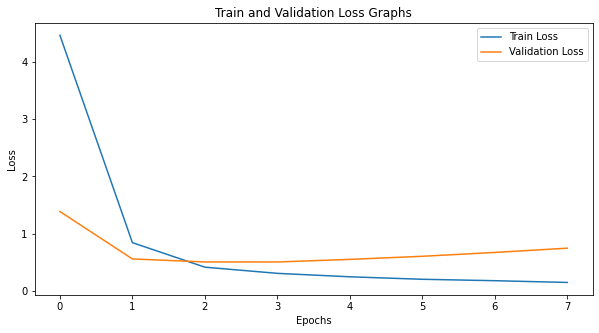

In [124]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

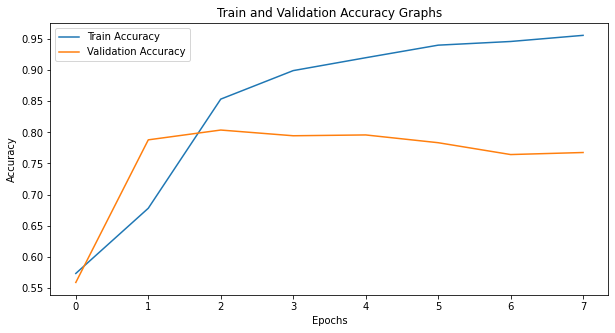

In [125]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [126]:
X_test = X_test.apply(tokenization)
X_test = X_test.apply(stopwords_remove)
X_test = X_test.apply(lemmatization)
X_test = X_test.str.join(' ')

X_test.head()

3738                           Morganite Gemstone White Fire Opal Sterling Silver Ring Size
4809                                              need work office bang fav Future jam loud
7600                                                   Evacuation order lift town Roosevelt
1361                     kshllcenterpri ProgressOhio burn build mean like burn black church
2773    Fascinating pics inside North Korea Not propaganda not devastation people live life
Name: text, dtype: object

In [127]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(padded_test, y_test)

48/48 [==============================] - 0s 6ms/step - loss: 0.5069 - accuracy: 0.8024


In [128]:
pred_train_lstm = model.predict(padded_train)
pred_test_lstm = model.predict(padded_test)

In [129]:
for i, x in enumerate(pred_test_lstm):
    if 0 <= x < 0.49:
        pred_test_lstm[i] = 0
    else:
        pred_test_lstm[i] = 1

for i, x in enumerate(pred_train_lstm):
    if 0 <= x < 0.49:
        pred_train_lstm[i] = 0
    else:
        pred_train_lstm[i] = 1

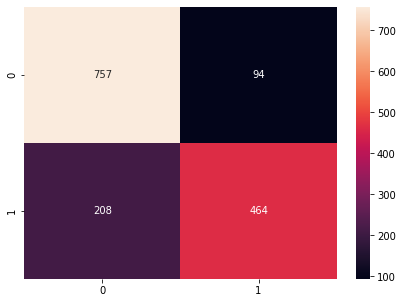

In [130]:
conm = confusion_matrix(y_true=y_test, y_pred=pred_test_lstm)
plt.figure(figsize=(7, 5))
sns.heatmap(conm, annot=True, fmt='d')
plt.show()

In [131]:
train_acc_lstm = round(accuracy_score(y_train, pred_train_lstm) * 100, 2)
print('Train Accuracy of the LSTM: %', train_acc_lstm)
test_acc_lstm = round(accuracy_score(y_test, pred_test_lstm) * 100, 2)
print('Test Accuracy of the LSTM: %', test_acc_lstm)

Train Accuracy of the LSTM: % 90.67
Test Accuracy of the LSTM: % 80.17


In [132]:
train_precision_lstm = round(precision_score(y_train, pred_train_lstm) * 100, 2)
print('Train Precision of the LSTM: %', train_precision_lstm)
precision_lstm = round(precision_score(y_test, pred_test_lstm) * 100, 2)
print('Test Precision of the LSTM: %', precision_lstm)

Train Precision of the LSTM: % 92.87
Test Precision of the LSTM: % 83.15


In [133]:
train_recall_lstm = round(recall_score(y_train, pred_train_lstm) * 100, 2)
print('Train Recall of the LSTM: %', train_recall_lstm)
recall_lstm = round(recall_score(y_test, pred_test_lstm) * 100, 2)
print('Test Recall of the LSTM: %', recall_lstm)

Train Recall of the LSTM: % 84.65
Test Recall of the LSTM: % 69.05


# Predict Disaster

In [134]:
def predict_disaster(input_text):
    input_text = input_text.lower()
    input_text = re.sub(r'[^a-zA-Z]', ' ', input_text)
    input_text = tokenization(input_text)
    input_text = stopwords_remove(input_text)
    input_text = lemmatization(input_text)
    input_text = ' '.join(input_text)
    input_text = tokenizer.texts_to_sequences([input_text])
    input_text = pad_sequences(input_text, maxlen=maxlen, padding='pre')
    input_text = model.predict(input_text)

    if input_text >= 0.5:
        input_text = f'Disaster with %{round(float(input_text * 100), 2)}'
    else:
        input_text = f'Not Disaster with %{round(float(input_text * 100), 2)}'
    
    return print(input_text)

In [135]:
pd.set_option('max_colwidth', 500)
df_test[['text']].head(15)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, stay safe everyone."
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
5,We're shaking...It's an earthquake
6,"They'd probably still show more life than Arsenal did yesterday, eh? EH?"
7,Hey! How are you?
8,What a nice hat?
9,Fuck off!


In [136]:
predict_disaster("Heard about #earthquake is different cities, stay safe everyone.")

Disaster with %77.95


In [137]:
predict_disaster("7611 police investigating after an e-bike collided with a car in little portugal. e-bike rider suffered serious non-life threatening injuries.")

Disaster with %93.34


In [138]:
predict_disaster("Awesome")

Not Disaster with %10.15


In [139]:
predict_disaster("They'd probably still show more life than Arsenal did yesterday, eh? EH?")

Not Disaster with %7.46


# Test Set

In [141]:
df_test['text'].str.lower()
#df['text'].head()

0                                                                                                                just happened a terrible car crash
1                                                                                  heard about #earthquake is different cities, stay safe everyone.
2                                                  there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all
3                                                                                                          apocalypse lighting. #spokane #wildfires
4                                                                                                     typhoon soudelor kills 28 in china and taiwan
                                                                           ...                                                                     
3258                                                                                        earthquake safety lo

In [142]:
df_test['text'] = df_test['text'].apply(remove_number)
df_test['text'] = df_test['text'].apply(remove_url)
df_test['text'] = df_test['text'].apply(remove_html)
df_test['text'] = df_test['text'].apply(remove_url)
df_test['text'] = df_test['text'].apply(remove_punctuations_numbers)
df_test['text'] = df_test['text'].apply(tokenization)
df_test['text'] = df_test['text'].apply(stopwords_remove)
df_test['text'] = df_test['text'].apply(lemmatization)
df_test['text'] = df_test['text'].apply(word_length_filter)
df_test['text'] = df_test['text'].str.join(' ')
df_test['text'].head()

0                             Just happen terrible car crash
1       Heard earthquake different cities stay safe everyone
2    forest fire spot pond geese flee across street not save
3                         Apocalypse light Spokane wildfires
4                         Typhoon Soudelor kill China Taiwan
Name: text, dtype: object

In [143]:
trget = df_test['text']

In [144]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(trget)

Tokenized_train = tokenizer.texts_to_sequences(trget)
Tokenized_val = tokenizer.texts_to_sequences(trget)

print('Non-tokenized Version: ', X_train[40])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train[40]]))

Non-tokenized Version:  Check nsfw
Tokenized Version:  [[201, 2183]]


In [145]:
maxlen = 50
padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

In [146]:
y_hat = model.predict(padded_val).round()
submission = pd.read_csv("data/sample_submission.csv")
submission['target'] = np.round(y_hat).astype('int')

In [147]:
submission.to_csv('data/sample_predict.csv')

In [148]:
merged_table = pd.merge(df_test, submission, on='id', how='left')

In [149]:
# pd.set_option('max_colwidth', 500)
# merged_table[['text','target']].head(30)